In [1]:
#!pip install --upgrade diffusers transformers scipy

In [2]:
import diffusers
import transformers
import scipy
import torch

print(diffusers.__version__)
print(transformers.__version__)
print(scipy.__version__)
print(torch.__version__)

0.19.3
4.31.0
1.11.1
1.12.1+cu116


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

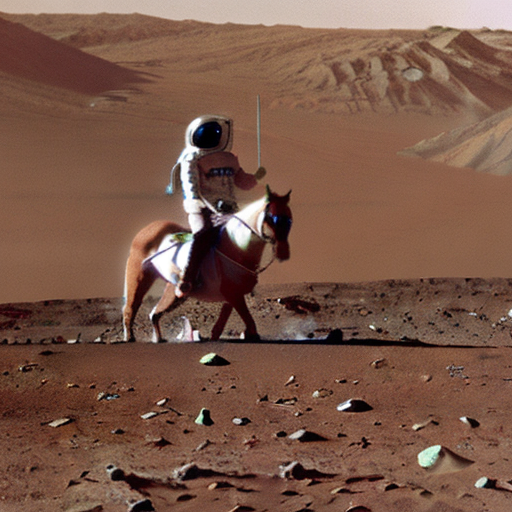

In [3]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, height=512, width=512).images[0]   
image

  0%|          | 0/50 [00:00<?, ?it/s]

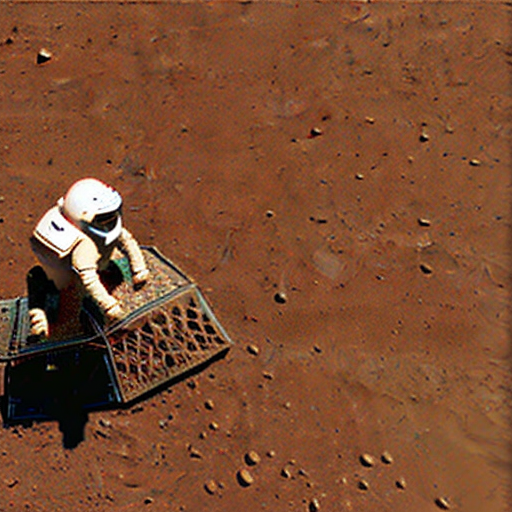

In [4]:
generator = torch.Generator(device='cuda').manual_seed(1)
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, height=512, width=512, generator=generator).images[0]   
image

  0%|          | 0/50 [00:00<?, ?it/s]

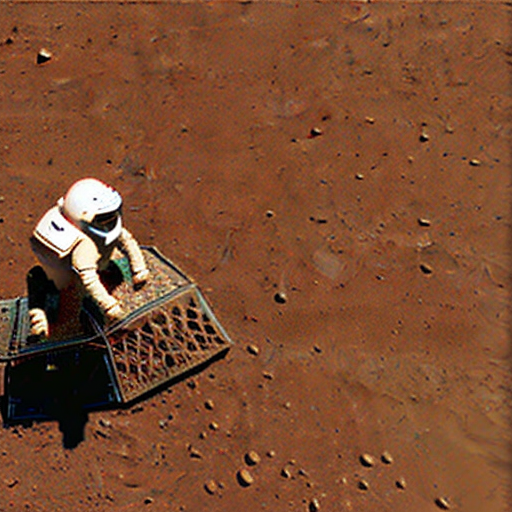

In [5]:
generator = torch.Generator(device='cuda').manual_seed(1)
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, height=512, width=512, generator=generator).images[0]   
image

In [6]:
print(pipe.__call__.__doc__)


        The call function to the pipeline for generation.

        Args:
            prompt (`str` or `List[str]`, *optional*):
                The prompt or prompts to guide image generation. If not defined, you need to pass `prompt_embeds`.
            height (`int`, *optional*, defaults to `self.unet.config.sample_size * self.vae_scale_factor`):
                The height in pixels of the generated image.
            width (`int`, *optional*, defaults to `self.unet.config.sample_size * self.vae_scale_factor`):
                The width in pixels of the generated image.
            num_inference_steps (`int`, *optional*, defaults to 50):
                The number of denoising steps. More denoising steps usually lead to a higher quality image at the
                expense of slower inference.
            guidance_scale (`float`, *optional*, defaults to 7.5):
                A higher guidance scale value encourages the model to generate images closely linked to the text
            